In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/content/drive/MyDrive/Stock/SamSung.csv')
df

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


         Date     Open     High      Low    Close     Adj Close    Volume
0  2018-12-12  40250.0  40700.0  40150.0  40450.0  35281.417969  12024279
1  2018-12-13  40650.0  40750.0  40000.0  40000.0  34888.921875  26254646
2  2018-12-14  40200.0  40200.0  38700.0  38950.0  33973.089844  19671783
3  2018-12-17  38650.0  39600.0  38650.0  39150.0  34147.535156  11532968
4  2018-12-18  38300.0  39200.0  38300.0  38900.0  33929.472656  11042101


In [48]:
# 2.  chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']] # Biến phụ thuộc theo mảng 2 chiều



In [49]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 10, 'gamma': 'scale'}
Best score: 11842181.578759762


In [50]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([59714.3166389 , 60018.892743  , 59613.03856877, 58907.92594344,
       59309.9995436 , 58508.27080312, 58508.27080312, 58508.27080312,
       57815.01709737, 57520.34385326, 57815.01709737, 57032.41011831,
       55685.02958685, 55589.65879687, 55494.37736047, 57422.44171863,
       58210.19027871, 58807.77978938, 60120.6515844 , 60528.73451672,
       60630.99312137, 60630.99312137, 60630.99312137, 61040.82604728,
       60938.25865253, 60426.56612898, 60938.25865253, 61760.26708218,
       63200.67857068, 63405.92504858, 64529.18570441, 64427.54724692,
       63200.67857068, 62172.02716047, 63405.92504858, 63508.45377308,
       62480.87419385, 61966.12267929, 62789.57232522, 62789.57232522,
       62480.87419385, 62480.87419385, 63405.92504858, 63405.92504858,
       63200.67857068, 62789.57232522, 62480.87419385, 62274.98322954,
       61246.14642916, 61966.12267929, 62069.07171327, 60222.51985567,
       60835.76044968, 61246.14642916, 60630.99312137, 61040.82604728,
      

In [51]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[73500.]])

In [52]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([72871.27552457]),
 array([72247.80836969]),
 array([71635.63955533]),
 array([71039.32466225]),
 array([70461.72886961]),
 array([69904.08869362]),
 array([69366.25145157]),
 array([68846.9915052]),
 array([68344.32463642]),
 array([67855.77559133]),
 array([67378.58282642]),
 array([66909.84298578]),
 array([66446.60655549]),
 array([65985.93878743]),
 array([65524.95947496]),
 array([65060.8735687]),
 array([64591.0030127]),
 array([64112.82891406]),
 array([63624.05211435]),
 array([63122.67895066]),
 array([62607.13672927]),
 array([62076.41922094]),
 array([61530.25534996]),
 array([60969.28372596]),
 array([60395.20269267]),
 array([59810.85353394]),
 array([59220.18964657]),
 array([58628.09445]),
 array([58040.04003166]),
 array([57461.62256654])]

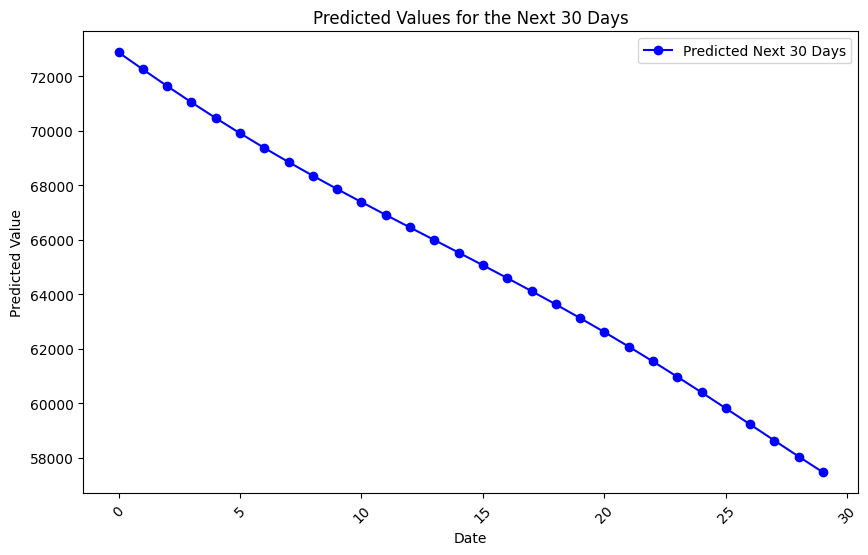

In [53]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [54]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [55]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: Close    460.783392
dtype: float64
Testing MAPE: 0.005438810773749461
Testing MAE: 362.7200916168957


In [56]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: Close    460.783392
dtype: float64
Testing MAPE: 0.005438810773749461
Testing MAE: 362.7200916168957


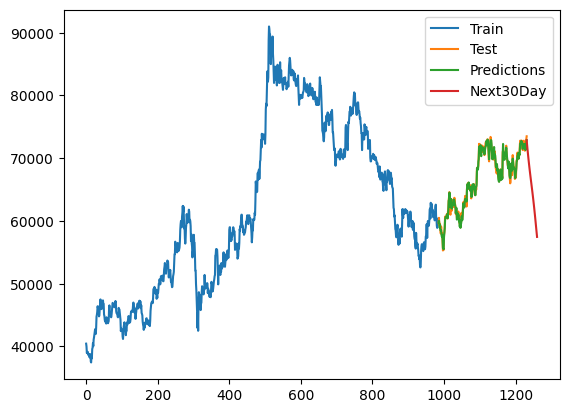

In [57]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()